In [2]:
#Plot BKG Files

In [3]:
import numpy as np
import csky as cy
import matplotlib.pyplot as plt
import histlite as hl
cy.plotting.mrichman_mpl()

/mnt/lfs7/user/ssclafani/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [4]:
base_dir = '/data/user/ssclafani/data/analyses/baseline_bandcut5/'
plot_dir = '/home/ssclafani/public_html/DNNC/plots/'

In [5]:
#PS

In [6]:
ps_bkg = np.load(base_dir + 'ps/trials/DNNC/bg_chi2.dict', allow_pickle=True)

In [7]:
b = cy.dists.Chi2TSD(ps_bkg['dec'][29])

In [8]:
def plot_ps_bkg(dec):
    b = cy.dists.Chi2TSD(ps_bkg['dec'][dec])
    title = 'BKG PS: $\delta$: {:.2f}'.format(dec)

    fig, ax = plt.subplots()
    h = b.get_hist(bins=30)
    hl.plot1d(ax, h, crosses=True,
              label='{} bg trials'.format(b.n_total))
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + '/ps/bkg'), 'ps_bkg_dec_{:.2f}'.format(dec))
    plt.close()

In [11]:
#for dec in np.arange(-89,89, 2):
#    plot_ps_bkg(dec)
for dec in [-31,1,31]:
    plot_ps_bkg(dec)


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots//ps/bkg/ps_bkg_dec_-31.00


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots//ps/bkg/ps_bkg_dec_1.00


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots//ps/bkg/ps_bkg_dec_31.00


In [12]:
cats = ['snr', 'pwn', 'unid']
bkgs = {}
for cat in cats:
    bkgs[cat] = np.load(base_dir + 'stacking/{}_bg.dict'.format(cat), allow_pickle=True)

In [13]:
def plot_stacking_bkg(cat):
    b = cy.dists.Chi2TSD(bkgs[cat])
    title = 'BKG Stacking: {}'.format(cat)

    fig, ax = plt.subplots()
    h = b.get_hist(bins=30)
    hl.plot1d(ax, h, crosses=True,
              label='{} bg trials'.format(b.n_total))
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + 'catalogs/bkg'), '{}_bkg'.format(cat))

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/catalogs/bkg/snr_bkg


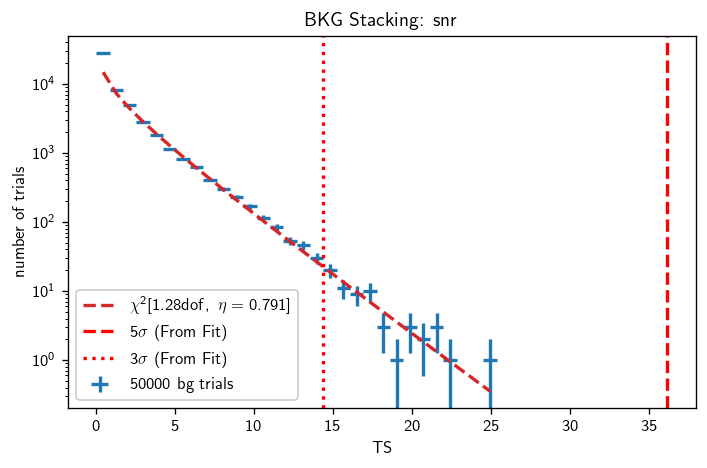

In [14]:
plot_stacking_bkg('snr')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/catalogs/bkg/pwn_bkg


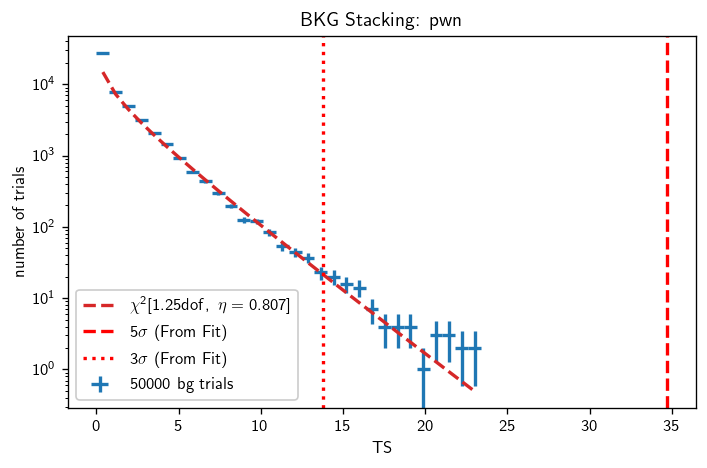

In [15]:
plot_stacking_bkg('pwn')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/catalogs/bkg/unid_bkg


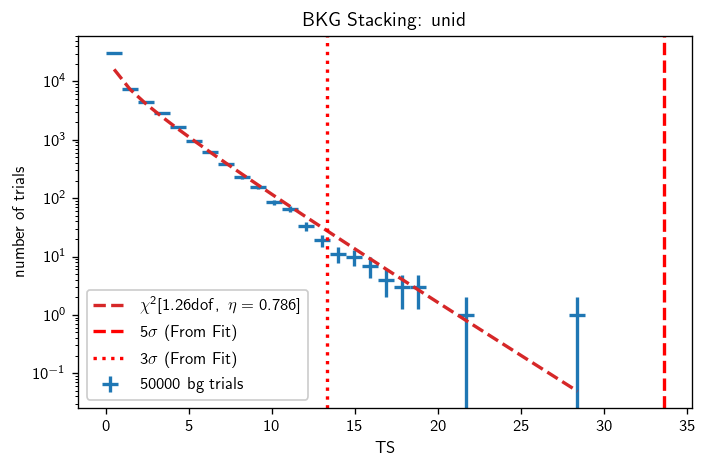

In [16]:
plot_stacking_bkg('unid')

In [17]:
#Templates / GP

In [49]:
temp_bkg =  np.load(base_dir + 'gp/gp.dict', allow_pickle=True)

In [41]:
def plot_gp_bkg(temp):
    
    b = cy.dists.Chi2TSD(temp_bkg[temp]['poisson']['nsig'][0.0])
    if temp == 'kra5':
        temp_print = 'KRA$_\gamma^{5 \sf{PeV}}$'
    elif temp == 'kra50':
        temp_print = 'KRA$_\gamma^{50 \sf{PeV}}$'
    elif temp == 'pi0':
        temp_print = 'Fermi $\pi^0$'
    title = 'BKG: {}'.format(temp_print)

    fig, ax = plt.subplots()
    h = b.get_hist(bins=30)
    hl.plot1d(ax, h, crosses=True,
              label='{} bg trials'.format(b.n_total))
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + 'gp/bkg'), '{}_bkg'.format(temp))

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/kra5_bkg


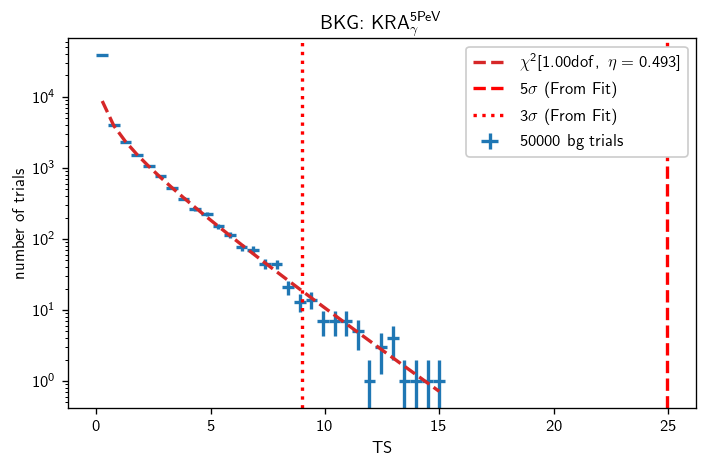

In [42]:
plot_gp_bkg('kra5')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/kra50_bkg


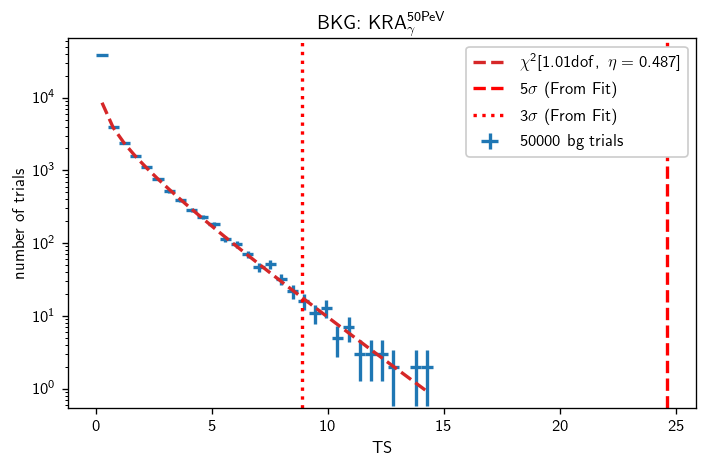

In [43]:
plot_gp_bkg('kra50')

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/pi0_bkg


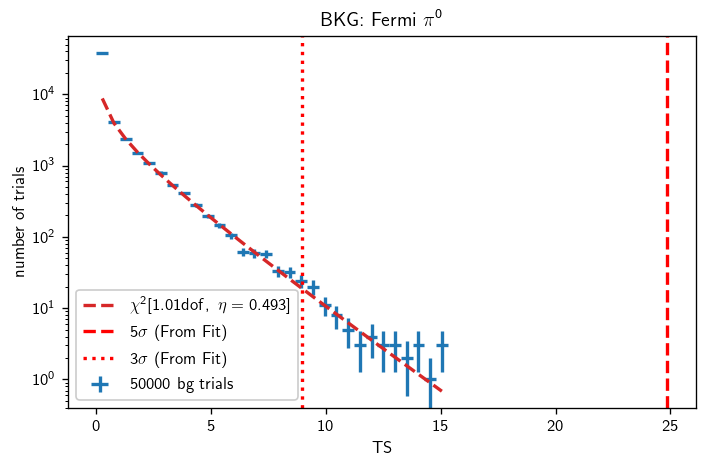

In [44]:
plot_gp_bkg('pi0')

In [50]:
def plot_fb_bkg(cutoff):

    b = cy.dists.Chi2TSD(temp_bkg['fermibubbles']['poisson']['cutoff'][cutoff]['nsig'][0.0])
    temp_print = 'Fermi Bubbles'
    temp = 'fermibubbles'
    title = 'BKG: {} - Cutoff {} TeV'.format(temp_print, cutoff)

    fig, ax = plt.subplots()
    h = b.get_hist(bins=30)
    hl.plot1d(ax, h, crosses=True,
              label='{} bg trials'.format(b.n_total))
    x = h.centers[0]
    norm = h.integrate().values
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + 'gp/bkg'), '{}_bkg_cutoff_{}'.format(temp, cutoff))

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/fermibubbles_bkg_cutoff_inf


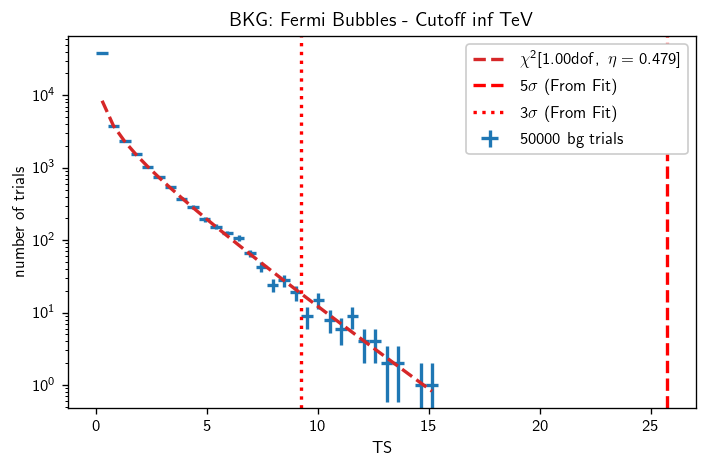

In [51]:
plot_fb_bkg(np.inf)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/fermibubbles_bkg_cutoff_100


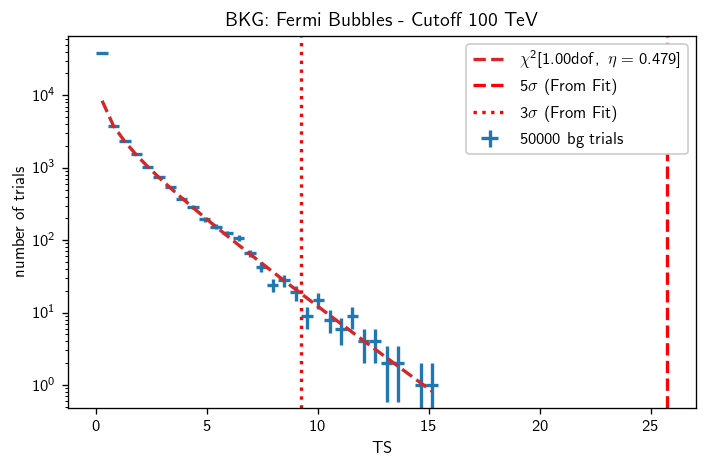

In [52]:
plot_fb_bkg(100)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/fermibubbles_bkg_cutoff_50


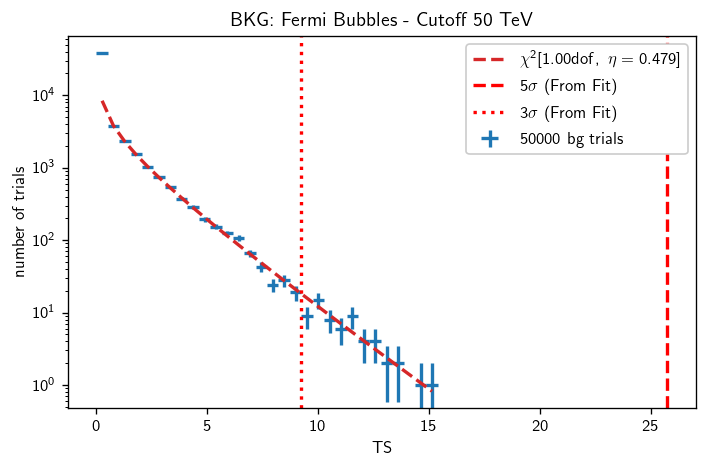

In [53]:
plot_fb_bkg(50)

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


-> /home/ssclafani/public_html/DNNC/plots/gp/bkg/fermibubbles_bkg_cutoff_1000


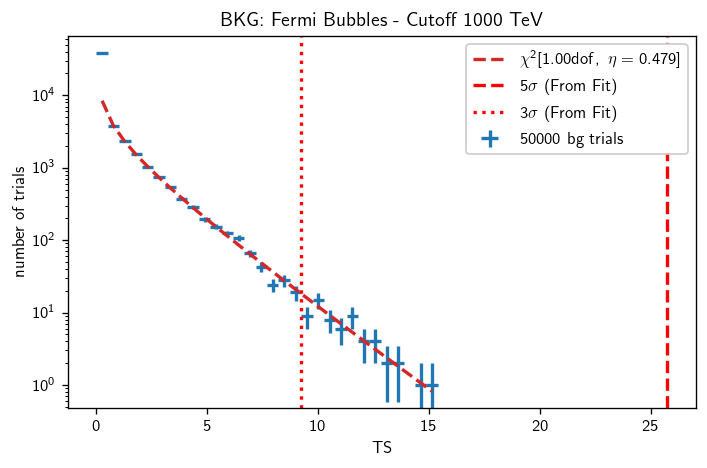

In [54]:
plot_fb_bkg(1000)